## Lab session 6

5. Prediction, Classification And Accuracy optimization

## Exercise 1
In this exercise, you will work on CDC's indicators of Heart Disease. Use a model of you choicee to Predict with minimum 80% accuracy.

Test your model on th following persons:
1. [20, Yes, No, Non, 10, 10, Yes, Male, 50-54, White, No, No, Fair, 4.0, Yes, No, Yes]
2. [35, No, No, No, 1à, 30, Yes, Male, 55-59, Black, Yes, Yes, Fair, 10.0, No, Yes, No]

What are the least decisive parameters, which parameters can we eliminate, how does it affect our prediction model?

URL : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Exercise 2
The following dataset includes features of multiple grilled mushrooms configurations, to determine whether they edible or not. Build a classification model to obtain the highest possible accuracy. What is most impacting feature ?

URL : https://www.kaggle.com/datasets/uciml/mushroom-classification

6. Neural Network on the Fashion MNIST dataset

## Exercise 3

Create a neural network for classification on the Fashion MNIST dataset. To do so, you can load the dataset by doing the following:
(Choose the right values for the different variables)

In [10]:
import torch
import torchvision #torch package for vision related things
import torch.nn.functional as F #torch package for neural network related things
import torchvision.datasets as datasets #torch package for vision related things
import torchvision.transforms as transforms #torch package for vision related things
from torchvision.transforms import ToTensor, Lambda #Transform PIL images to torch.FloatTensor
from torch import nn # For the neural network
from torch import optim # For the optimizer
from torch.utils.data import DataLoader # For the data loader
from tqdm import tqdm # For the progress bar
import matplotlib.pyplot as plt # For the plots

##SOLUTION
input_size = 784 # 28*28 Size of the initial input
num_classes = 10 # 10 classes
learning_rate = 0.001 # Learning rate
batch_size = 64 # Batch size

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Fashion MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We will use this dataset to train a neural network to classify these images.

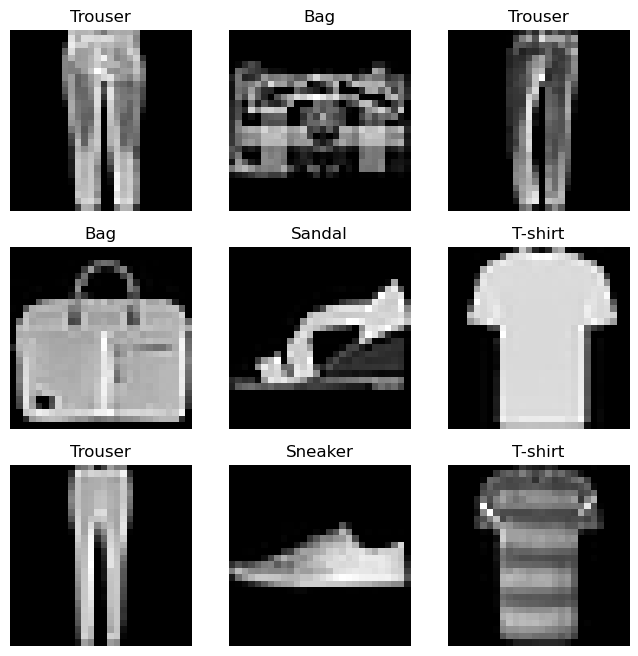

In [3]:
#Visualize the data
labels_maps = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range (1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_maps[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


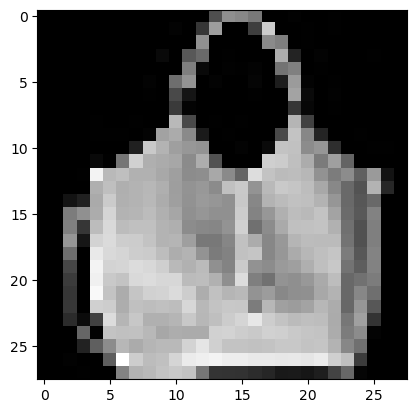

Label : 8


In [4]:
#Display image and label.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label : {label}")

In [5]:
# Transform all the data
ds = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


Define the neural network as you think will make the more sense for the dataset.
The goal is an accuracy of 80%.

In [6]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the neural network
        self.flatten = nn.Flatten()

    def forward(self, x):
        # Define the forward pass
        x = self.flatten(x)
        return x

In [11]:
#Initialize the neural network
model = NeuralNetwork().to(device)

#Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#Print the model
print(model)

ValueError: optimizer got an empty parameter list